# Exploring the Chinook database with SQL

In this notebook, you will practice using SQL queries with Pandas to explore the [Chinook database](https://chinookdatabase.codeplex.com/) of music.

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.io import sql

In [2]:
from sqlalchemy import create_engine, inspect

Here is a function for howing table information:

In [3]:
def table_info(table_name, i):
    """Shwo the column names and types as a Pandas DataFrame."""
    return pd.DataFrame(i.get_columns(table_name))[['name','type']]

In [4]:
import os
assert os.path.isfile(os.path.join('data', 'Chinook_Sqlite.sqlite'))

## Exploring the database

Create an SqlAlchemy engine for the Chinook database, which is in the file `data/Chinook_Sqlite.sqlite` as save the engine in a variable named `ce`:

In [5]:
ce = create_engine('sqlite:///data/Chinook_Sqlite.sqlite')

In [6]:
import sqlalchemy
assert isinstance(ce, sqlalchemy.engine.base.Engine)

Create an inspector for that engine and save it in a variable named `inspector`:

In [7]:
inspector = inspect(ce)

In [8]:
assert isinstance(inspector, sqlalchemy.engine.reflection.Inspector)

Use the `inspector` and `table_info` to show the column information of the `Genre` table:

In [9]:
table_info('Genre', inspector)

,name,type
0,GenreId,INTEGER
1,Name,NVARCHAR(120)


Use a SQL `SELECT` statement with `LIMIT` to look at the first 10 rows of the `Genre` table:

In [10]:
sql.read_sql_query('SELECT * from Genre LIMIT 10', ce)

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


Use the `inspector` and `table_info` to show the column information of the `Track` table:

In [11]:
table_info('Track', inspector)

,name,type
0,TrackId,INTEGER
1,Name,NVARCHAR(200)
2,AlbumId,INTEGER
3,MediaTypeId,INTEGER
4,GenreId,INTEGER
5,Composer,NVARCHAR(220)
6,Milliseconds,INTEGER
7,Bytes,INTEGER
8,UnitPrice,"NUMERIC(10, 2)"


Use a SQL `SELECT` statement with `LIMIT` to look at the first 10 rows of the `Track` table:

In [12]:
sql.read_sql_query('SELECT * from Track LIMIT 10', ce)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
5,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99
6,7,Let's Get It Up,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99
7,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99
8,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99
9,10,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99


Use the `inspector` and `table_info` to show the column information of the `MediaType` table:

In [13]:
table_info('MediaType', inspector)

,name,type
0,MediaTypeId,INTEGER
1,Name,NVARCHAR(120)


Use a SQL `SELECT` statement with `LIMIT` to look at the first 10 rows of the `MediaType` table:

In [14]:
sql.read_sql_query('SELECT * from MediaType LIMIT 10', ce)

,MediaTypeId,Name
0,1,MPEG audio file
1,2,Protected AAC audio file
2,3,Protected MPEG-4 video file
3,4,Purchased AAC audio file
4,5,AAC audio file


Write an SQL query to select the `Name`, `Composer` and `UnitPrice` columns from the `Track` table for the rows where the `UnitPrice` is greater than `0.99`:

In [15]:
sql.read_sql_query("""
SELECT Name, Composer, UnitPrice FROM Track
  WHERE UnitPrice>0.99;
""",ce)

,Name,Composer,UnitPrice
0,Battlestar Galactica: The Story So Far,None,1.99
1,Occupation / Precipice,None,1.99
2,"Exodus, Pt. 1",None,1.99
3,"Exodus, Pt. 2",None,1.99
4,Collaborators,None,1.99
5,Torn,None,1.99
6,A Measure of Salvation,None,1.99
7,Hero,None,1.99
8,Unfinished Business,None,1.99
9,The Passage,None,1.99


Join the `Track` and `Genre` tables on the `GenreId` columns and compute the average track length in seconds grouped by `Genre.Name`. Sort the results by the track length (`Track.Milliseconds`). Save the result in a variable named `r1`.

In [16]:
r1 = sql.read_sql_query("""
SELECT Genre.Name, AVG(Track.Milliseconds)/1000 AS Duration
  FROM Track
  JOIN Genre ON Genre.GenreId = Track.GenreId
 GROUP BY Genre.Name
 ORDER BY Duration DESC;
""", ce)

In [17]:
r1

,Name,Duration
0,Sci Fi & Fantasy,2911.783038
1,Science Fiction,2625.549077
2,Drama,2575.283781
3,TV Shows,2145.041022
4,Comedy,1585.263706
5,Metal,309.749444
6,Electronica/Dance,302.985800
7,Heavy Metal,297.452929
8,Classical,293.867568
9,Jazz,291.755377


Create a Seaborn barplot showing the average track duration for each genre:

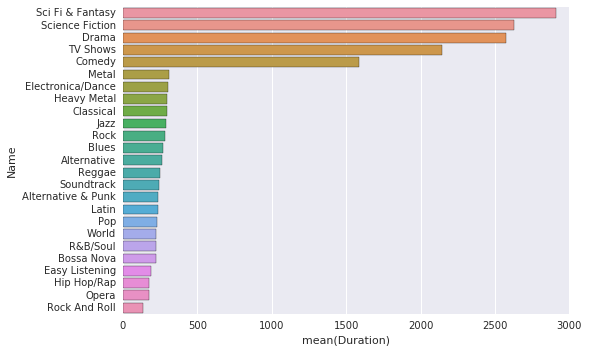

In [18]:
sns.barplot(x='Duration', y='Name', data=r1);

Join the `MediaType` and `Track` tables and count how many tracks are released with a given media format. Order by the count of the media type. Save the result in a variable named `r2`.

In [19]:
r2 = sql.read_sql_query("""
SELECT MediaType.Name, COUNT(*) AS Count
  FROM MediaType
  JOIN Track
    ON Track.MediaTypeId = MediaType.MediaTypeId
 GROUP BY MediaType.Name
 ORDER BY Count DESC;
""", ce)

In [20]:
r2

,Name,Count
0,MPEG audio file,3034
1,Protected AAC audio file,237
2,Protected MPEG-4 video file,214
3,AAC audio file,11
4,Purchased AAC audio file,7


Make a bar plot of the media type counts:

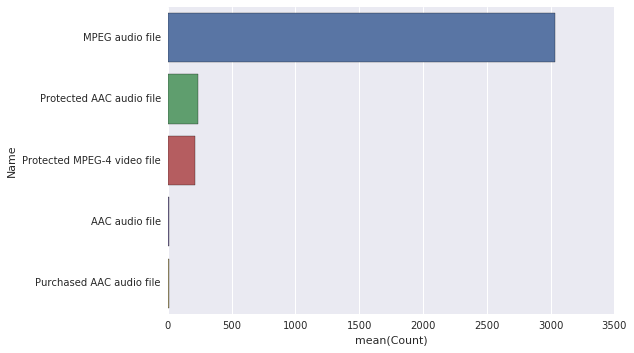

In [21]:
sns.barplot(x='Count', y='Name', data=r2);